In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import pandas as pd
import numpy as np
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
%matplotlib inline
np.random.seed(123)
import tensorflow as tf

from keras.applications import inception_v3, mobilenet_v2, vgg19, densenet
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

import os
from PIL import Image, ImageOps
from PIL import Image, ImageOps, ImageFilter
from sklearn.model_selection import train_test_split

from keras.applications import inception_v3, mobilenet_v2
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model



In [3]:
import pickle

In [2]:
albert_ = pd.DataFrame()
albert_['folder'] = ['test','test',
                    'train','train',
                    'val','val']
albert_['images'] = [234, 390,
                    1341, 3877,
                    8,8]
albert_['class'] = ['NORMAL','PNEUMONIA',
                   'NORMAL','PNEUMONIA',
                   'NORMAL','PNEUMONIA']

In [3]:
albert_

folder  images      class
0   test     234     NORMAL
1   test     390  PNEUMONIA
2  train    1341     NORMAL
3  train    3877  PNEUMONIA
4    val       8     NORMAL
5    val       8  PNEUMONIA

Text(0.5, 1.0, 'Original Dataset Directory Distribution')

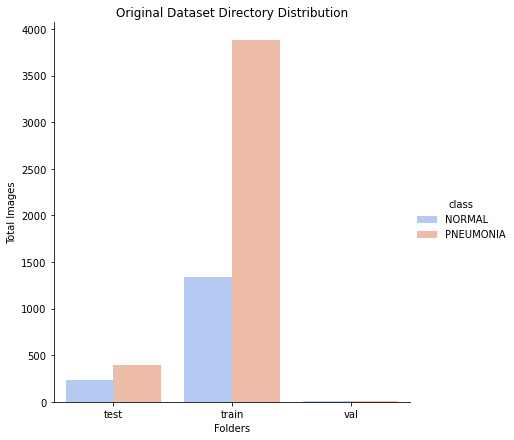

In [4]:
g = sns.catplot(
    data=albert_, kind="bar",
    x="folder", y="images", hue="class",
    palette="coolwarm", height=6
)

g.set_axis_labels("Folders", "Total Images")
g.ax.set_title('Original Dataset Directory Distribution')
# g.savefig('Original_dataset_Distribution')


In [7]:
import os
from PIL import Image, ImageOps
from PIL import Image, ImageOps, ImageFilter

In [8]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
%matplotlib inline
np.random.seed(123)
import tensorflow as tf

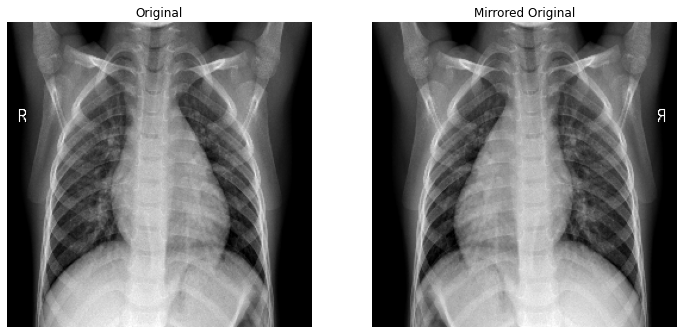

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('chest_xray/train/NORMAL/NORMAL2-IM-0383-0001.jpeg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Original')


ax_2 = ax[1]
img2 = load_img('chest_xray/train/NORMAL/mirror_NORMAL2-IM-0383-0001.jpeg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Mirrored Original')
# fig.savefig('Mirror_example', bbox_inches = 'tight', pad_inches=0)

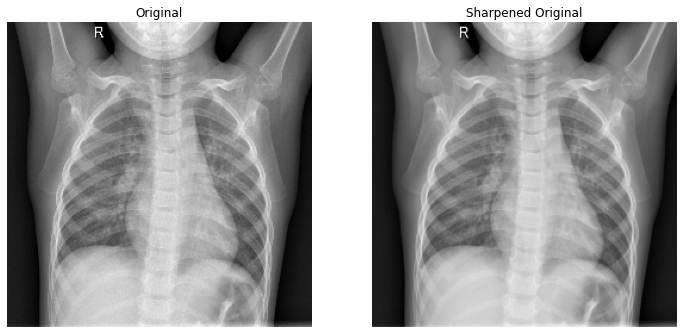

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('chest_xray/train/NORMAL/IM-0115-0001.jpeg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Original')


ax_2 = ax[1]
img2 = load_img('chest_xray/train/NORMAL/augment_IM-0115-0001.jpeg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Sharpened Original')
fig.savefig('Sharpened_example', bbox_inches = 'tight', pad_inches=0)

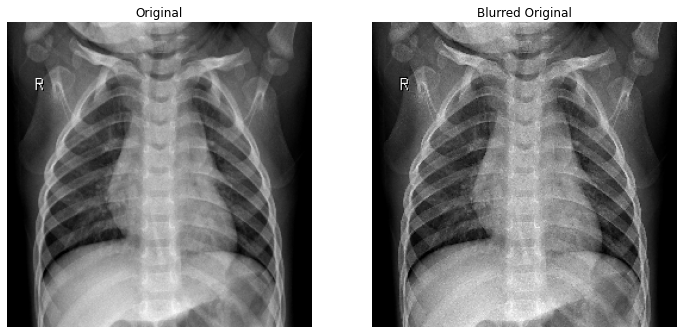

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('chest_xray/train/NORMAL/IM-0117-0001.jpeg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Original')


ax_2 = ax[1]
img2 = load_img('chest_xray/train/NORMAL/augment_IM-0117-0001.jpeg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Blurred Original')
fig.savefig('Blurred_example', bbox_inches = 'tight', pad_inches=0)

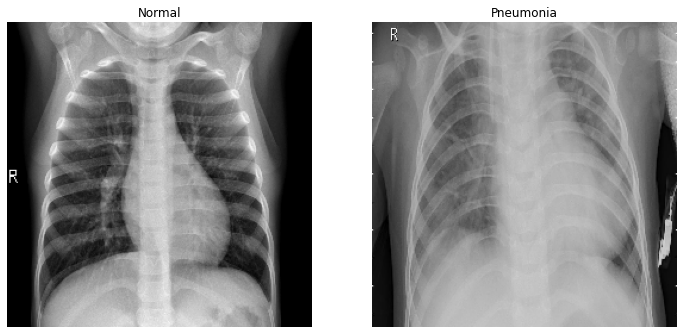

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('chest_xray/test/NORMAL/NORMAL2-IM-0374-0001.jpeg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Normal')


ax_2 = ax[1]
img2 = load_img('chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Pneumonia')
# fig.savefig('normal_pneumonia', bbox_inches = 'tight', pad_inches=0)

In [4]:
train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory = 'chest_xray/train',
        class_mode = 'binary',
        target_size =(128,128),
        batch_size = 7767)

test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory = 'chest_xray/test',
        class_mode = 'binary',
        target_size =(128,128),
        batch_size = 624)



Found 7767 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
test_images, test_labels = next(test)
train_images, train_labels = next(train)

In [6]:
X_model, X_test, y_model, y_test = train_test_split(train_images, train_labels, test_size=0.20, random_state=123)
y_model = np.reshape(y_model, (len(y_model),1))
y_test = np.reshape(y_test, (len(y_test),1))
test_labels = np.reshape(test_labels, (len(test_labels),1))

In [17]:
def CNNModel_Select(pretrained, input_shape, optimizer, metrics):
    """
    returns cnn model with select pretrained architecture. 
    X_model, X_test, y_model, y_test must first be split using train test split.
    
    parameters:
    pretrained = AS OBJECT, One of the pretrained architectures, must be architecture object! example: pretrained=inception_v3.InceptionV3
    input_shape = AS TUPLE, input shape of image as TUPLE. for example, (128,128,3).
    optimizer = AS STRING, when compiling which optimizer to use; example: 'Adam'
    metrics = AS LIST, a list of metrics to use; example: ['accuracy']
    
    """
    imagenet=pretrained(weights='imagenet',include_top=False, input_shape=input_shape)
    imagenet_new=imagenet.output
    new_model = models.Sequential()
    new_model.add(imagenet)
    new_model.add(GlobalAveragePooling2D())
    
    new_model.add(Dense(1024,activation='relu'))
    new_model.add(Dense(1024,activation='relu')) #dense layer 2
    new_model.add(Dense(512,activation='relu')) #dense layer 3
    new_model.add(Dense(1,activation='sigmoid'))
    
    new_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)


    nm = new_model.fit(X_model,
                 y_model,
                 epochs=10,
                 batch_size=50,
                 validation_data = (X_test, y_test),
                      workers = -1)

    return nm, new_model

In [55]:
nm, new_model = CNNModel_Select(pretrained = inception_v3.InceptionV3, 
                     input_shape = (128,128,3), 
                     optimizer = 'sgd', 
                     metrics = ['accuracy',tf.keras.metrics.Recall(name='recall')])

Epoch 1/10
125/125 [==============================] - 45s 361ms/step - loss: 0.3201 - accuracy: 0.8774 - recall: 0.8062 - val_loss: 0.1766 - val_accuracy: 0.9427 - val_recall: 0.9118
Epoch 2/10
125/125 [==============================] - 43s 344ms/step - loss: 0.0701 - accuracy: 0.9792 - recall: 0.9803 - val_loss: 0.0708 - val_accuracy: 0.9781 - val_recall: 0.9898
Epoch 3/10
125/125 [==============================] - 43s 344ms/step - loss: 0.0368 - accuracy: 0.9883 - recall: 0.9884 - val_loss: 0.0360 - val_accuracy: 0.9891 - val_recall: 0.9898
Epoch 4/10
125/125 [==============================] - 43s 345ms/step - loss: 0.0199 - accuracy: 0.9939 - recall: 0.9929 - val_loss: 0.0405 - val_accuracy: 0.9878 - val_recall: 0.9847
Epoch 5/10
125/125 [==============================] - 43s 346ms/step - loss: 0.0200 - accuracy: 0.9940 - recall: 0.9939 - val_loss: 0.0420 - val_accuracy: 0.9878 - val_recall: 0.9962
Epoch 6/10
125/125 [==============================] - 43s 344ms/step - loss: 0.0086 -

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [56]:
y_pred_percentages = new_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[120, 114],
       [  0, 390]], dtype=int64)

In [21]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [22]:
import itertools

Confusion matrix, without normalization
[[120 114]
 [  0 390]]


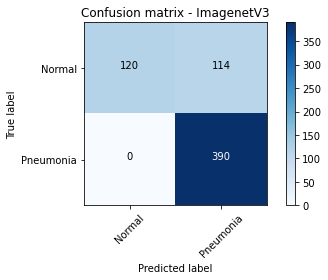

In [57]:
plot_confusion_matrix(confusion_matrix(test_labels, y_pred), classes=['Normal', 'Pneumonia'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

In [58]:
bool_prediction = y_pred > 0
ground_truth = np.concatenate(test_labels).astype(int) > 0

In [59]:
false_positives = ~ground_truth & bool_prediction
false_negatives = ground_truth & ~bool_prediction
true_positives = ground_truth & bool_prediction
true_negatives = ~ground_truth & ~bool_prediction


In [63]:
false_positives_index = []
for i in range(len(false_positives)-1):
    if false_positives[i] == True:
        false_positives_index.append(i)

In [86]:
def return_indexes(target_list, prediction_percentages):
    """
    target_list = false positives, false negatives, true positives, true negatives AFTER boolean conversion
    prediction_percentages = model.predict(testimages)
    
    returns a list of tuples
    [(prediction percentage, index)]
    
    """
    target_list_index = []
    for i in range(len(target_list)-1):
        if target_list[i] == True:
            target_list_index.append(i)
    
    target_list_percentage_index = []
    if len(target_list_index) == 0:
        return target_list_index
    else:
        for i in target_list_index:
            target_list_percentage_index.append((prediction_percentages[i], i))
            
    target_list_percentage_index.sort(key=lambda x: x[0], reverse=True)
    
    return target_list_percentage_index

In [87]:
def return_percentages_indexes(prediction_percentages,test_labels):
    """
    y_pred = predictions in percentage form between 0 and 1 from model.predict
    test_labels = actual labels 0 or 1
    
    returns 4 items
    true_negatives_index, 
    false_positives_index, 
    false_negatives_index, 
    true_positives_index
    
    They are list of tuples with (percentage predicted, index)
    """
    
    y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
    
    bool_prediction = y_pred > 0
    ground_truth = np.concatenate(test_labels).astype(int) > 0
    
    false_positives = ~ground_truth & bool_prediction
    false_negatives = ground_truth & ~bool_prediction
    true_positives = ground_truth & bool_prediction
    true_negatives = ~ground_truth & ~bool_prediction
    
    false_positives_index = return_indexes(false_positives, prediction_percentages)
    false_negatives_index = return_indexes(false_negatives, prediction_percentages)
    true_positives_index = return_indexes(true_positives, prediction_percentages)
    true_negatives_index = return_indexes(true_negatives, prediction_percentages)
    
    return true_negatives_index, false_positives_index, false_negatives_index, true_positives_index

In [88]:
true_negatives_index, false_positives_index, false_negatives_index, true_positives_index = return_percentages_indexes(y_pred_percentages,test_labels)

In [90]:
false_negatives_index

[]

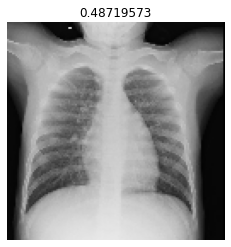

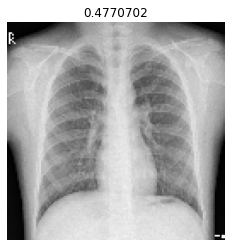

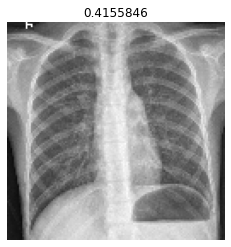

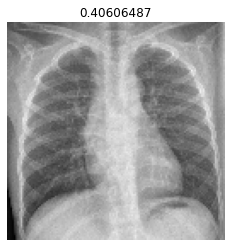

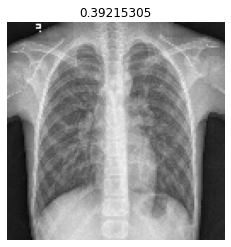

In [96]:
for i in true_negatives_index[:5]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

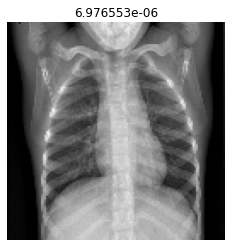

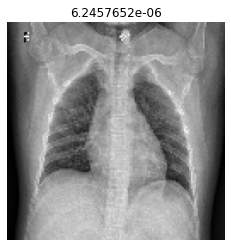

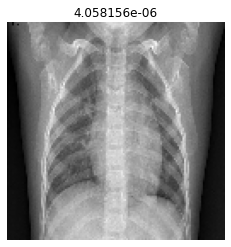

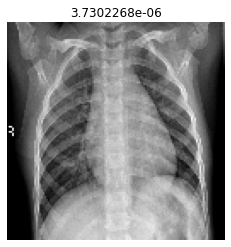

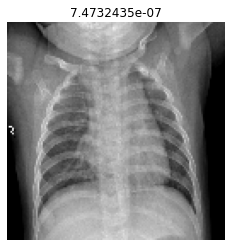

In [97]:
for i in true_negatives_index[-5:]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

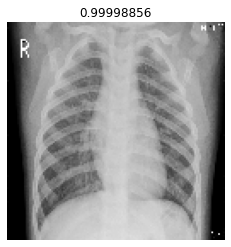

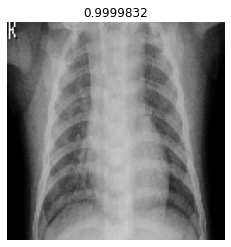

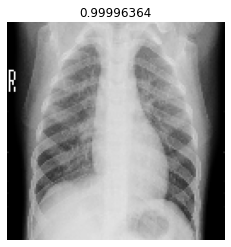

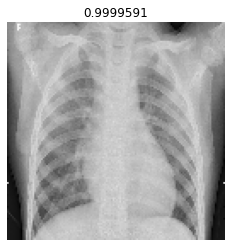

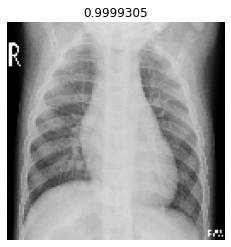

In [98]:
for i in false_positives_index[:5]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

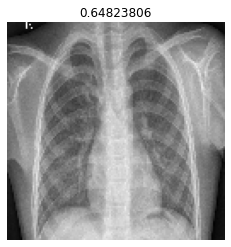

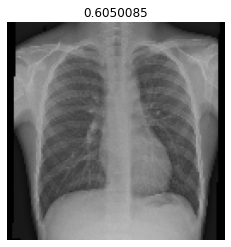

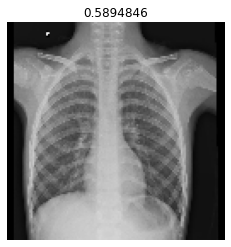

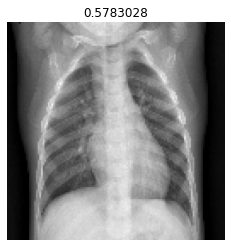

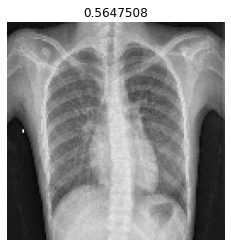

In [99]:
for i in false_positives_index[-5:]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

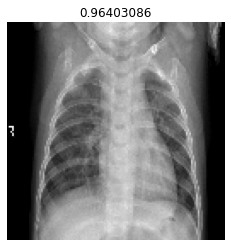

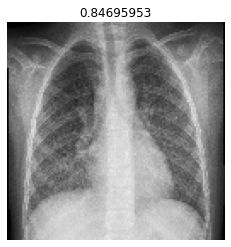

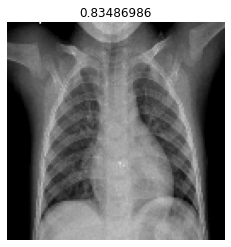

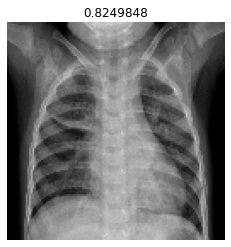

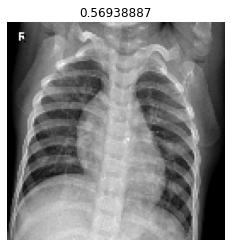

In [100]:
for i in true_positives_index[-5:]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

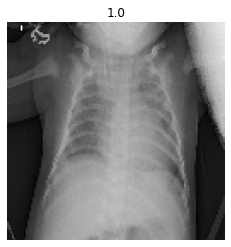

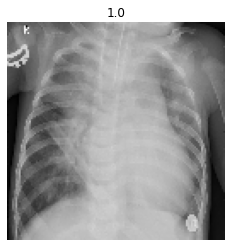

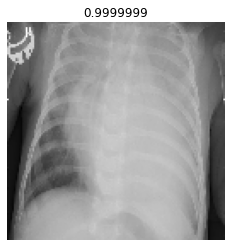

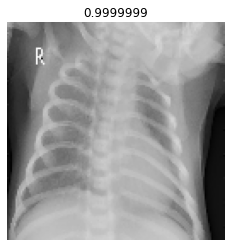

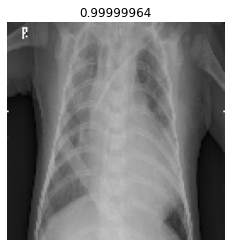

In [101]:
for i in true_positives_index[:5]:
    plt.imshow(test_images[i[1]])
    plt.axis('off')
    plt.title(i[0])
    plt.show()

In [82]:
y_pred_percentages

array([1.15875006e-01, 9.99726236e-01, 9.99991775e-01, 9.99957323e-01,
       9.99854445e-01, 9.99965429e-01, 9.99878883e-01, 9.99997854e-01,
       9.99721944e-01, 9.98906493e-01, 9.99853253e-01, 9.96037722e-01,
       3.64537933e-04, 9.99989867e-01, 9.99412775e-01, 6.48238063e-01,
       9.99982834e-01, 9.99893427e-01, 9.99990940e-01, 9.98986304e-01,
       9.98595417e-01, 9.99649405e-01, 9.99770105e-01, 9.99850392e-01,
       6.97655287e-06, 9.99982476e-01, 9.95904624e-01, 9.99903679e-01,
       9.93983924e-01, 9.98513639e-01, 9.99933362e-01, 3.24343979e-01,
       9.99883652e-01, 3.06930002e-02, 9.01835883e-05, 9.99987602e-01,
       9.99437749e-01, 9.99136865e-01, 9.97953057e-01, 9.97531652e-01,
       9.95750666e-01, 9.99639392e-01, 9.99640107e-01, 9.92476881e-01,
       9.94462788e-01, 9.99755919e-01, 9.99895215e-01, 9.97077942e-01,
       9.99264896e-01, 9.99858856e-01, 9.72713590e-01, 9.99549687e-01,
       9.99914289e-01, 9.99967933e-01, 1.04969658e-03, 9.99638557e-01,
      

In [67]:
l1 = []
for i in false_positives_index:
    l1.append((y_pred_percentages[i], i))

In [69]:
l1.sort(key=lambda x: x[0], reverse=True)

In [70]:
l1

[(0.99998856, 507),
 (0.9999832, 324),
 (0.99996364, 360),
 (0.9999591, 219),
 (0.9999305, 359),
 (0.99987996, 210),
 (0.9998437, 56),
 (0.99983895, 615),
 (0.99976426, 332),
 (0.9996536, 566),
 (0.99957055, 533),
 (0.9994881, 619),
 (0.9994466, 102),
 (0.9994172, 444),
 (0.9994128, 14),
 (0.99938047, 245),
 (0.99935526, 218),
 (0.99919695, 396),
 (0.99918693, 531),
 (0.9991627, 611),
 (0.9991059, 284),
 (0.9990125, 591),
 (0.99892586, 188),
 (0.99874556, 385),
 (0.998713, 579),
 (0.9986834, 377),
 (0.9985329, 537),
 (0.99840504, 86),
 (0.99826187, 462),
 (0.99802387, 106),
 (0.9976446, 459),
 (0.9976057, 111),
 (0.9976057, 550),
 (0.99718994, 69),
 (0.9971794, 226),
 (0.99667066, 354),
 (0.9965333, 113),
 (0.9962555, 409),
 (0.9959046, 26),
 (0.99545276, 551),
 (0.9954235, 361),
 (0.9952004, 85),
 (0.995047, 345),
 (0.99502915, 455),
 (0.9949498, 95),
 (0.99440575, 99),
 (0.9940959, 290),
 (0.99391466, 281),
 (0.9931832, 452),
 (0.9925028, 128),
 (0.9924769, 43),
 (0.9922504, 182),
 (

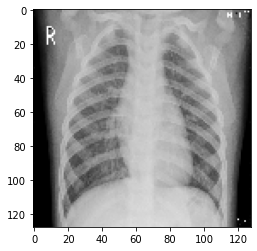

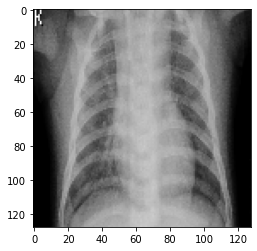

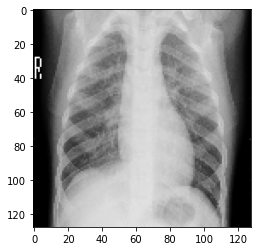

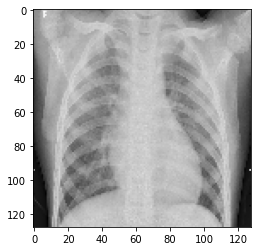

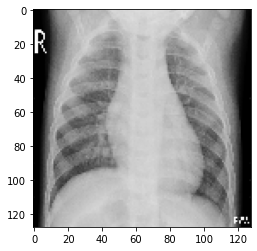

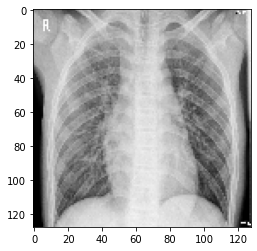

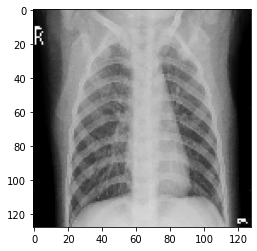

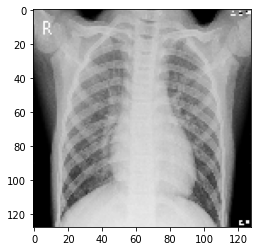

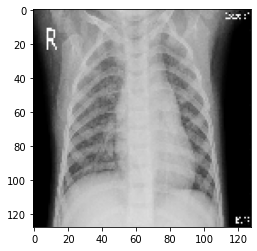

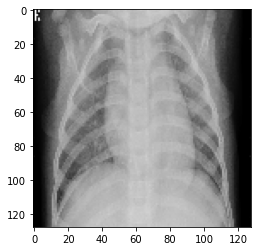

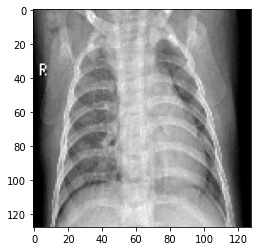

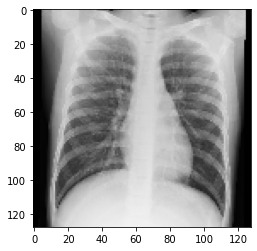

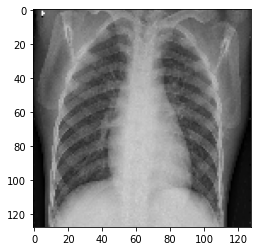

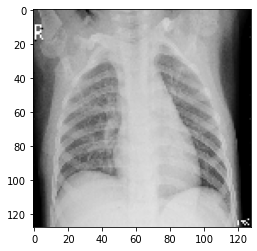

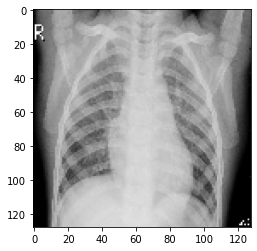

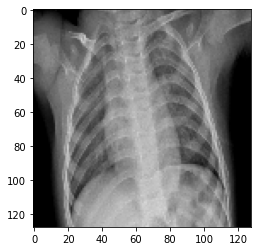

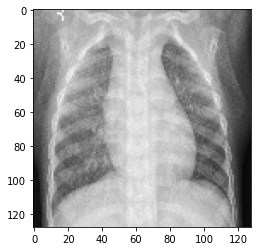

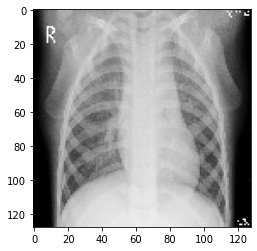

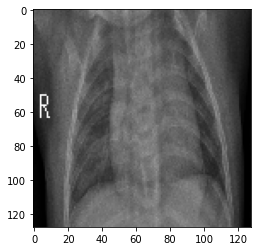

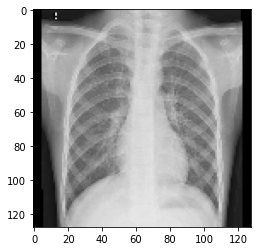

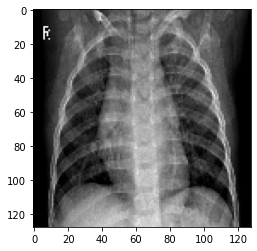

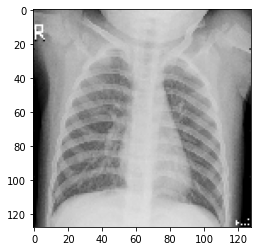

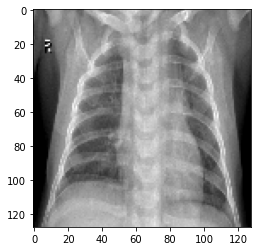

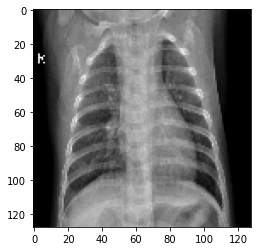

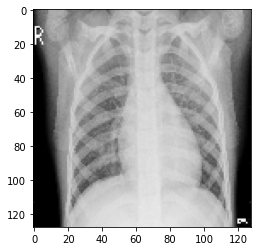

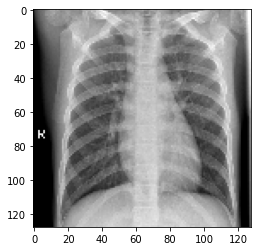

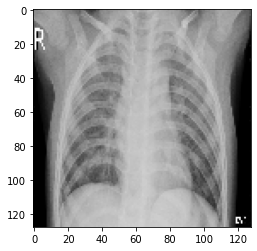

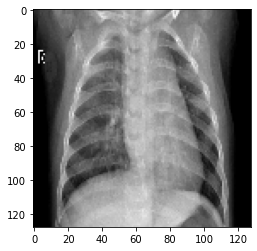

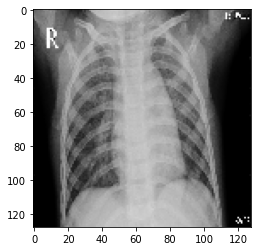

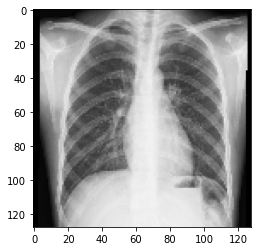

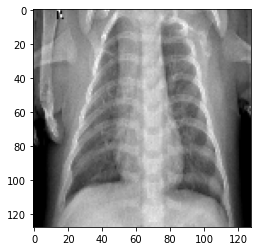

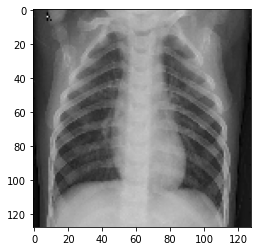

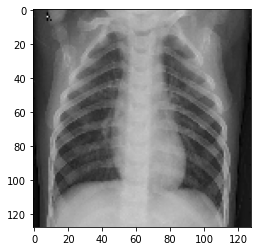

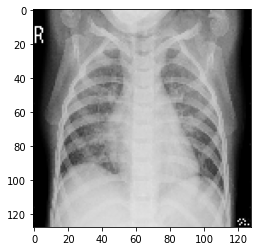

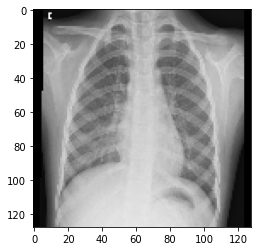

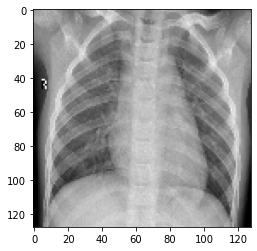

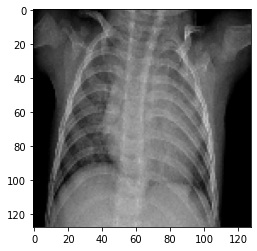

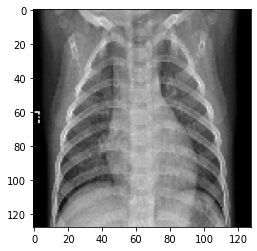

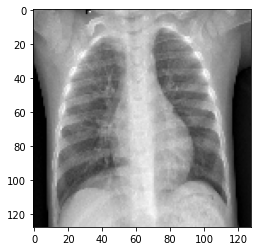

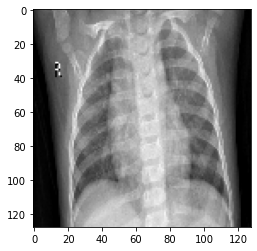

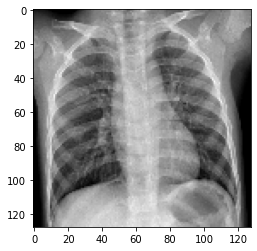

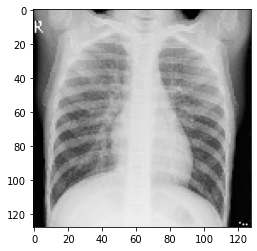

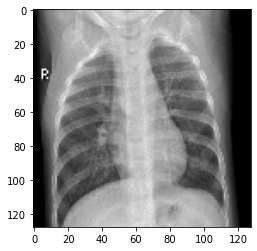

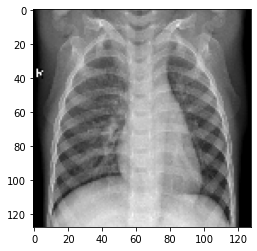

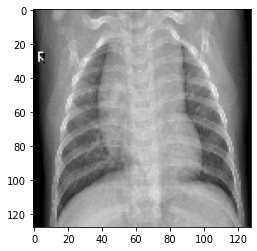

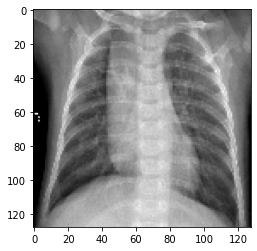

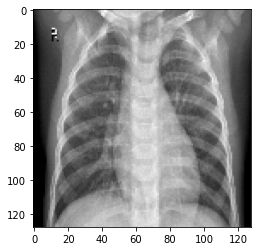

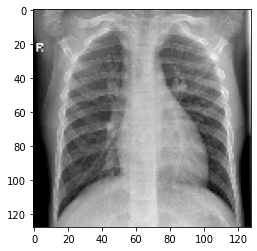

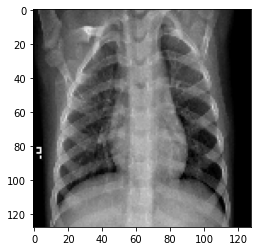

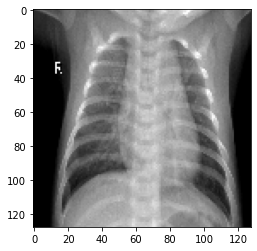

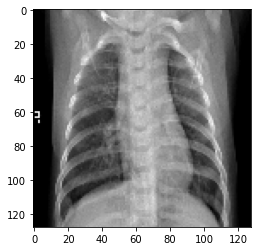

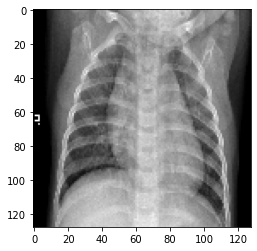

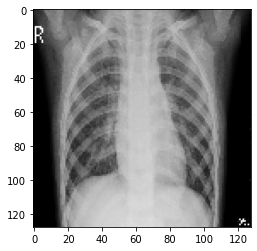

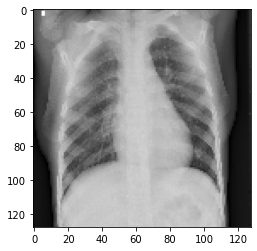

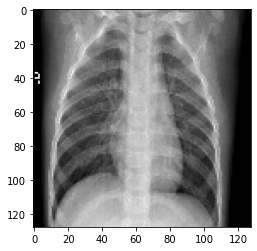

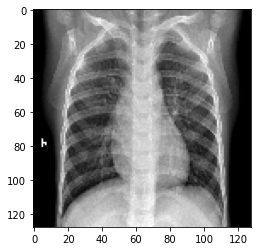

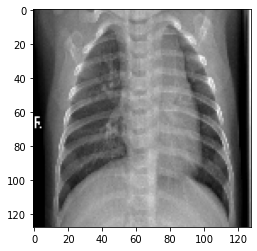

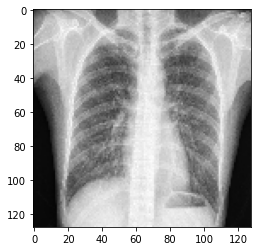

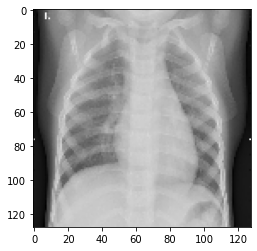

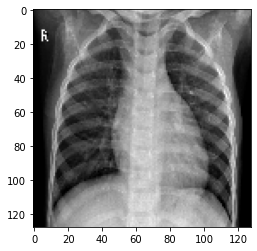

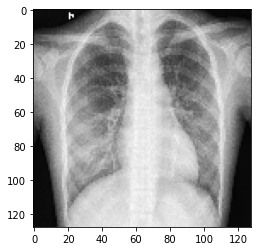

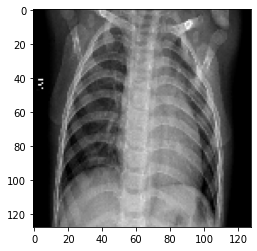

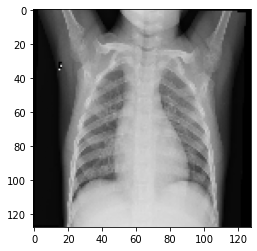

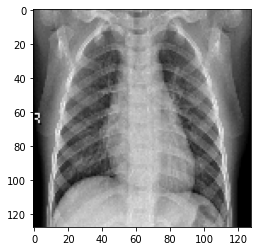

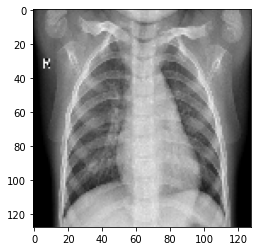

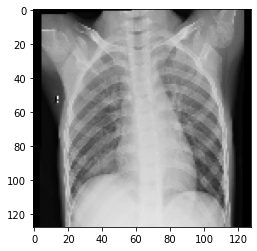

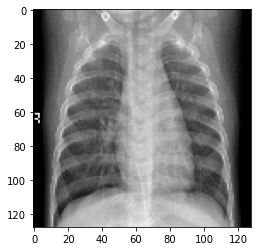

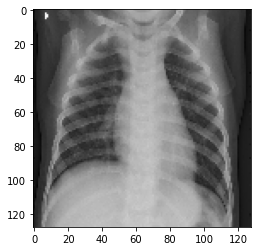

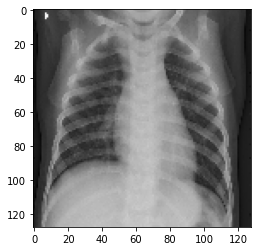

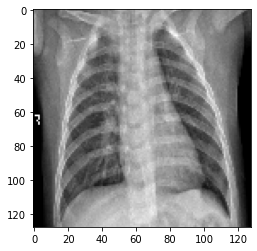

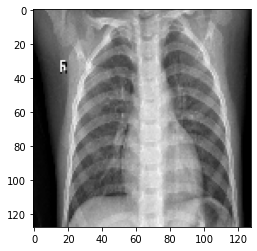

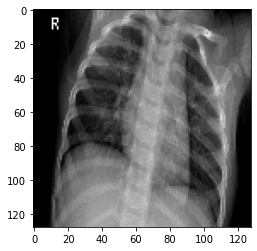

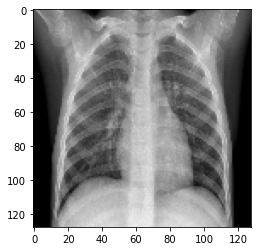

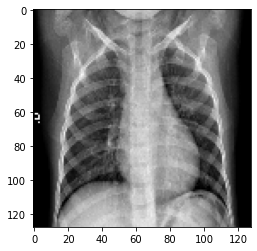

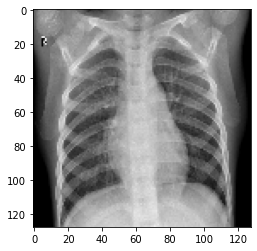

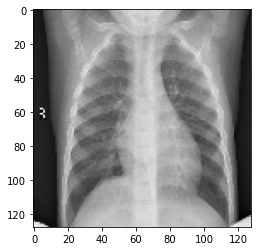

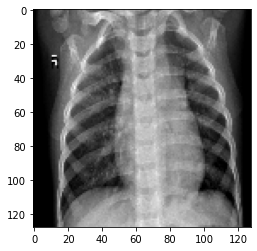

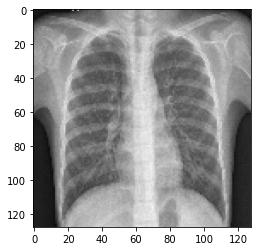

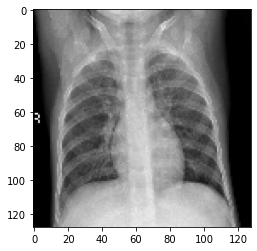

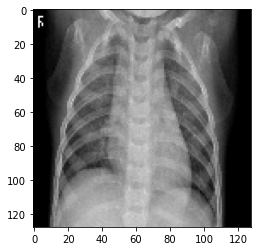

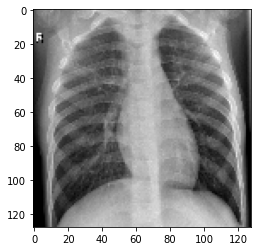

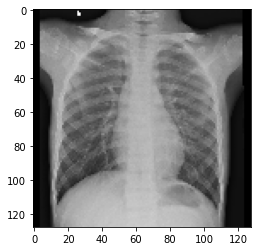

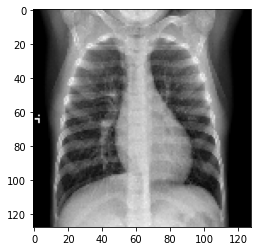

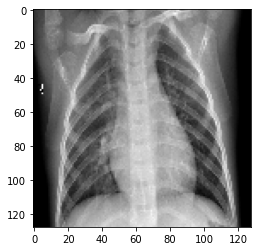

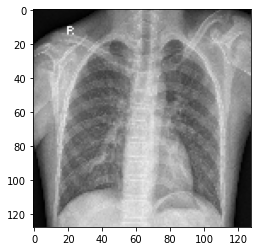

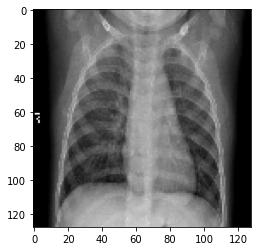

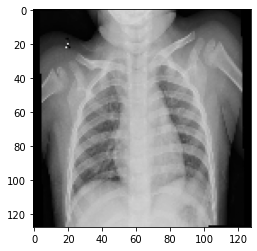

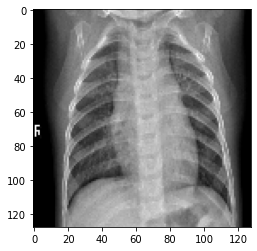

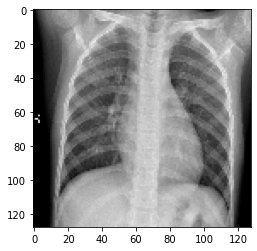

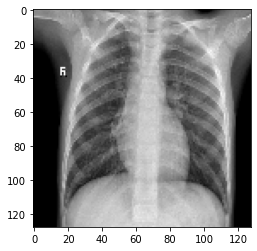

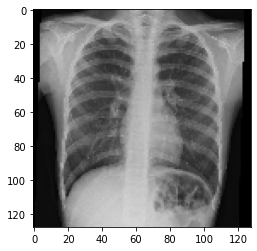

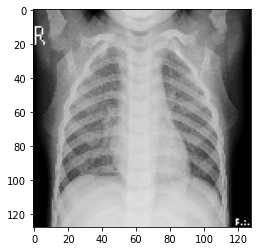

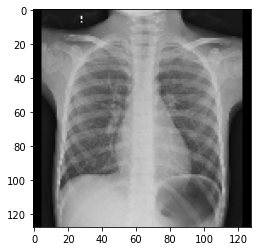

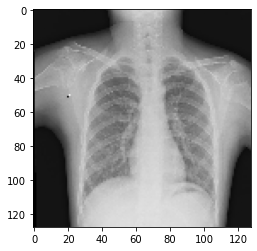

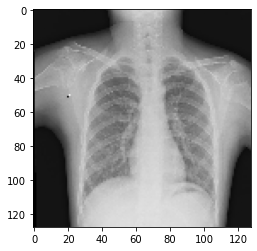

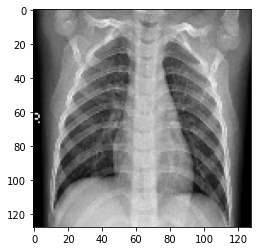

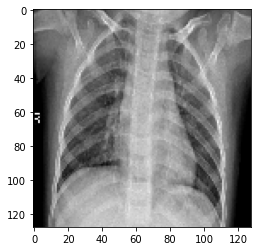

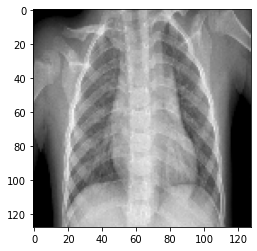

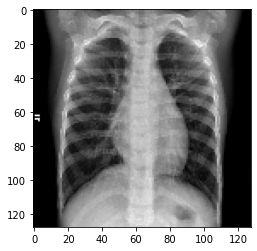

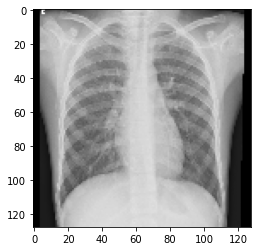

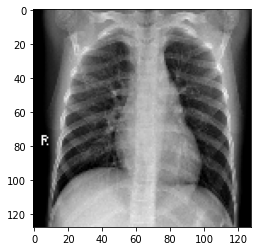

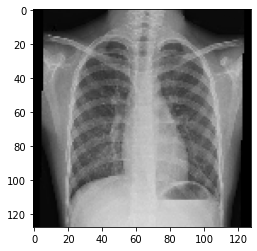

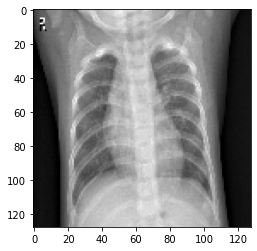

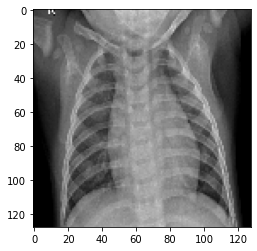

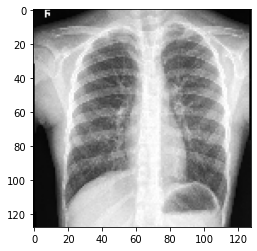

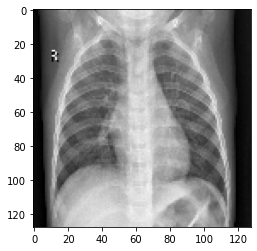

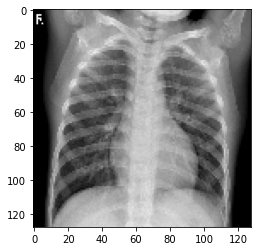

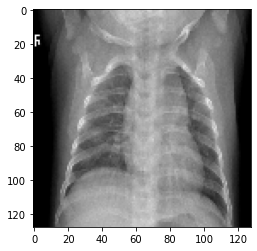

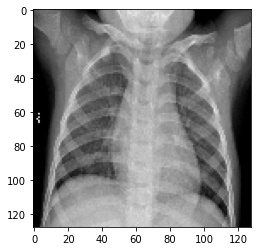

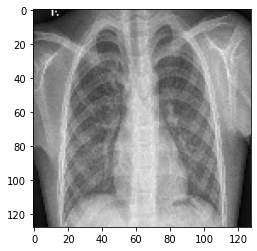

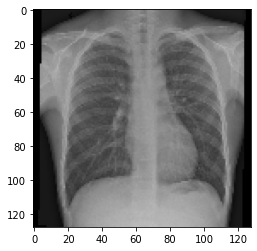

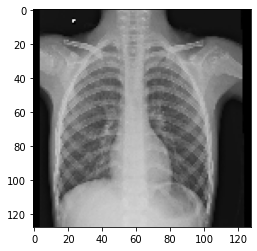

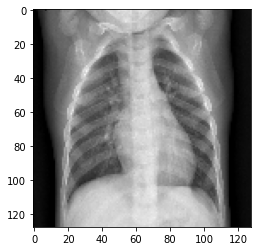

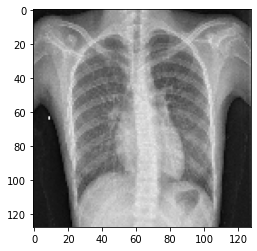

In [75]:
for i in l1:
    plt.imshow(test_images[i[1]])
    plt.show()

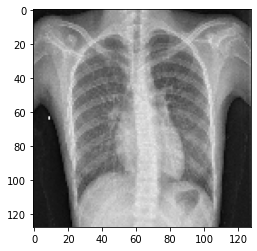

In [73]:
plt.imshow(test_images[246])

In [61]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
np.concatenate(test_labels).astype(int)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [34]:
np.concatenate(test_labels).astype(int)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [30]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [36]:
from keras.applications import InceptionResNetV2

In [37]:
nm, new_model = CNNModel_Select(pretrained = InceptionResNetV2, 
                     input_shape = (128,128,3), 
                     optimizer = 'sgd', 
                     metrics = ['accuracy',tf.keras.metrics.Recall(name='recall')])

219062272/219055592 [==============================] - 24s 0us/step
Epoch 1/10
125/125 [==============================] - 98s 786ms/step - loss: 0.3294 - accuracy: 0.8888 - recall: 0.8797 - val_loss: 0.2841 - val_accuracy: 0.8784 - val_recall: 0.9898
Epoch 2/10
125/125 [==============================] - 91s 729ms/step - loss: 0.0793 - accuracy: 0.9726 - recall: 0.9700 - val_loss: 0.2359 - val_accuracy: 0.9234 - val_recall: 0.9898
Epoch 3/10
125/125 [==============================] - 91s 729ms/step - loss: 0.0362 - accuracy: 0.9894 - recall: 0.9906 - val_loss: 0.3857 - val_accuracy: 0.9698 - val_recall: 0.9501
Epoch 4/10
125/125 [==============================] - 91s 729ms/step - loss: 0.0206 - accuracy: 0.9929 - recall: 0.9929 - val_loss: 1.2621 - val_accuracy: 0.9723 - val_recall: 0.9821
Epoch 5/10
125/125 [==============================] - 91s 728ms/step - loss: 0.0112 - accuracy: 0.9968 - recall: 0.9958 - val_loss: 1.2944 - val_accuracy: 0.9755 - val_recall: 0.9655
Epoch 6/10
125/12

In [38]:
y_pred_percentages = new_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[132, 102],
       [ 11, 379]], dtype=int64)

In [39]:
nm = new_model.fit(X_model,
                 y_model,
                 epochs=5,
                 batch_size=50,
                 validation_data = (X_test, y_test),
                      workers = -1)

Epoch 1/5
125/125 [==============================] - 91s 731ms/step - loss: 0.0047 - accuracy: 0.9987 - recall: 0.9987 - val_loss: 0.6178 - val_accuracy: 0.9228 - val_recall: 0.8504
Epoch 2/5
125/125 [==============================] - 91s 730ms/step - loss: 0.0120 - accuracy: 0.9961 - recall: 0.9948 - val_loss: 0.5484 - val_accuracy: 0.9749 - val_recall: 0.9629
Epoch 3/5
125/125 [==============================] - 91s 730ms/step - loss: 0.0045 - accuracy: 0.9986 - recall: 0.9987 - val_loss: 0.7814 - val_accuracy: 0.9633 - val_recall: 0.9335
Epoch 4/5
125/125 [==============================] - 91s 731ms/step - loss: 0.0053 - accuracy: 0.9986 - recall: 0.9984 - val_loss: 0.2572 - val_accuracy: 0.9749 - val_recall: 0.9578
Epoch 5/5
125/125 [==============================] - 91s 729ms/step - loss: 0.0031 - accuracy: 0.9990 - recall: 0.9987 - val_loss: 0.3016 - val_accuracy: 0.9788 - val_recall: 0.9668


In [40]:
y_pred_percentages = new_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[133, 101],
       [  2, 388]], dtype=int64)

In [41]:
nm = new_model.fit(X_model,
                 y_model,
                 epochs=5,
                 batch_size=50,
                 validation_data = (X_test, y_test),
                      workers = -1)

Epoch 1/5
125/125 [==============================] - 91s 731ms/step - loss: 0.0020 - accuracy: 0.9997 - recall: 1.0000 - val_loss: 0.7094 - val_accuracy: 0.9749 - val_recall: 0.9591
Epoch 2/5
125/125 [==============================] - 91s 730ms/step - loss: 0.0022 - accuracy: 0.9994 - recall: 0.9987 - val_loss: 0.2290 - val_accuracy: 0.9775 - val_recall: 0.9655
Epoch 3/5
125/125 [==============================] - 91s 729ms/step - loss: 0.0028 - accuracy: 0.9997 - recall: 0.9997 - val_loss: 0.3131 - val_accuracy: 0.9794 - val_recall: 0.9655
Epoch 4/5
125/125 [==============================] - 91s 729ms/step - loss: 0.0018 - accuracy: 0.9995 - recall: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9550 - val_recall: 0.9207
Epoch 5/5
125/125 [==============================] - 91s 732ms/step - loss: 0.0069 - accuracy: 0.9974 - recall: 0.9955 - val_loss: 1.7876 - val_accuracy: 0.8366 - val_recall: 0.9706


In [44]:
y_pred_percentages = new_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[ 25, 209],
       [  2, 388]], dtype=int64)

In [43]:
new_model

In [45]:
nm = new_model.fit(X_model,
                 y_model,
                 epochs=1,
                 batch_size=50,
                 validation_data = (X_test, y_test),
                      workers = -1)

125/125 [==============================] - 91s 732ms/step - loss: 0.0061 - accuracy: 0.9984 - recall: 0.9987 - val_loss: 0.2684 - val_accuracy: 0.9762 - val_recall: 0.9668


In [46]:
y_pred_percentages = new_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[132, 102],
       [  3, 387]], dtype=int64)

In [47]:
new_model1 = open('model.json', 'r')

In [48]:
loaded_new_model1 = new_model1.read()
new_model1.close()

In [49]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_new_model1)

In [50]:
y_pred_percentages = loaded_model.predict(test_images)
y_pred_percentages = np.concatenate(y_pred_percentages)
y_pred = np.where(y_pred_percentages > 0.5, 1, 0)
confusion_matrix(test_labels, y_pred)

array([[234,   0],
       [390,   0]], dtype=int64)

In [51]:
loaded_model